In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)

(550068, 12)


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
cat_col = ['Product_ID', 'Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']

In [11]:
for i in range(len(cat_col)):
    print('---------'+cat_col[i]+'----------')
    print(df[cat_col[i]].value_counts())

---------Product_ID----------
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00224642       1
P00353042       1
P00162742       1
P00073342       1
P00070142       1
Name: Product_ID, Length: 3631, dtype: int64
---------Gender----------
M    414259
F    135809
Name: Gender, dtype: int64
---------Age----------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
---------City_Category----------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
---------Stay_In_Current_City_Years----------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


<AxesSubplot:>

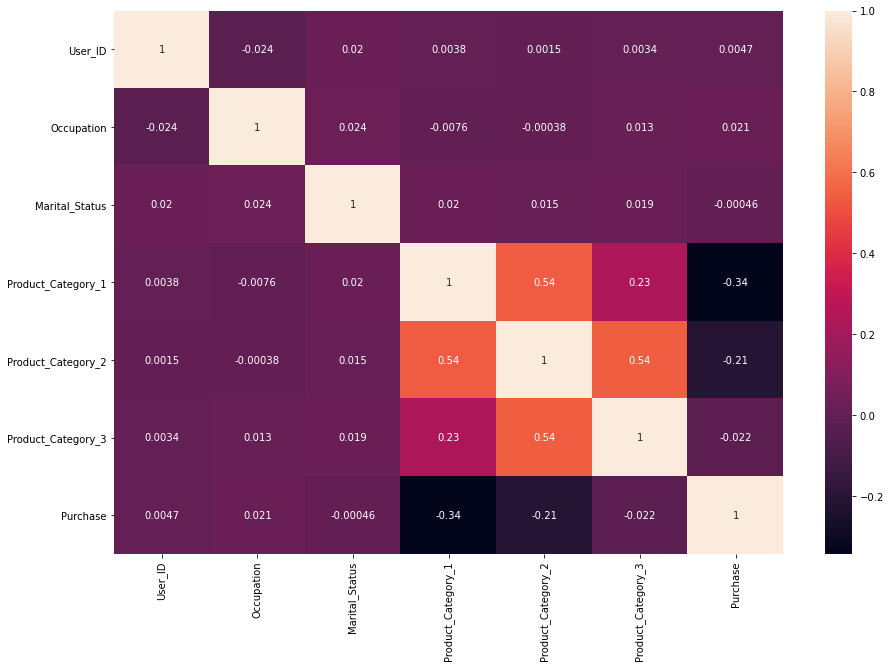

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

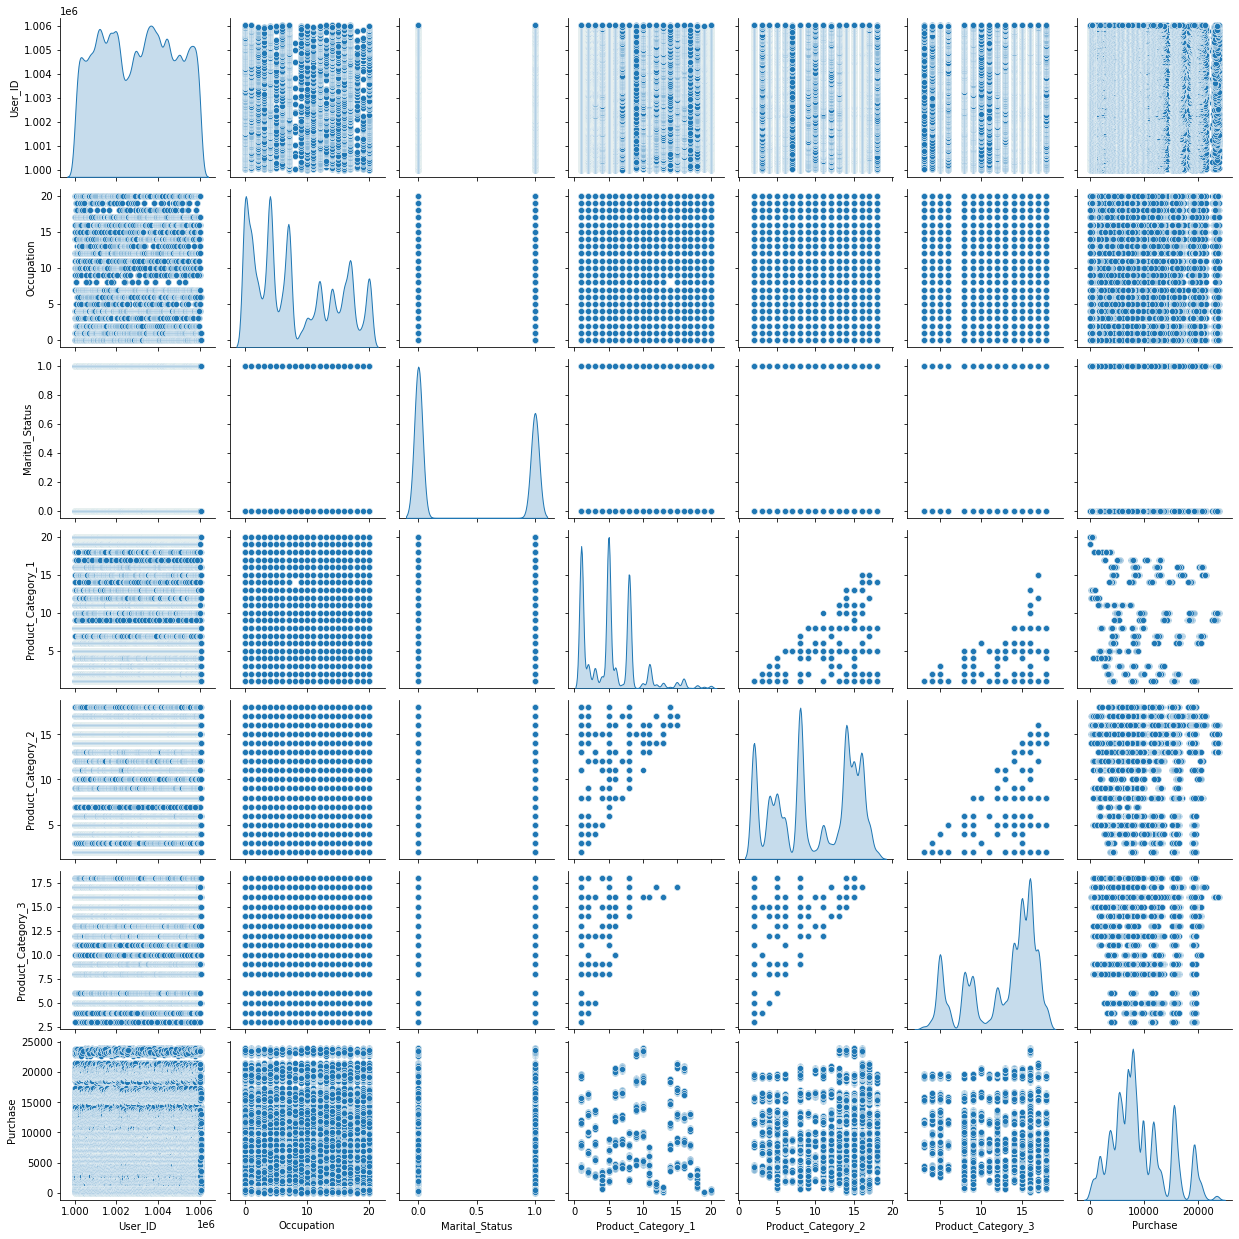

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df,diag_kind='kde')

In [14]:
dft = df.iloc[:,1:-1]

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

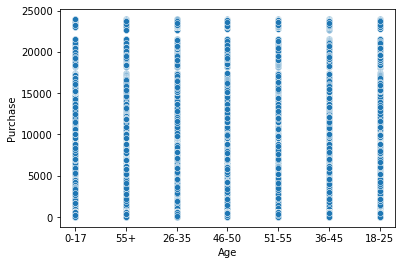

In [15]:
sns.scatterplot(x=df.Age,y=df.Purchase)

In [16]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

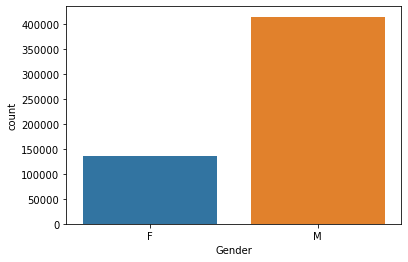

In [17]:
sns.countplot(x = 'Gender',data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

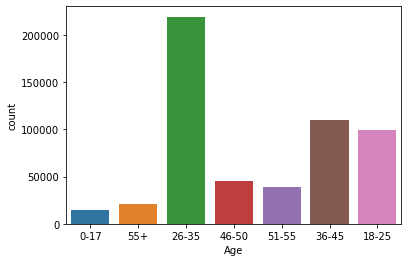

In [18]:
sns.countplot(x = 'Age',data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

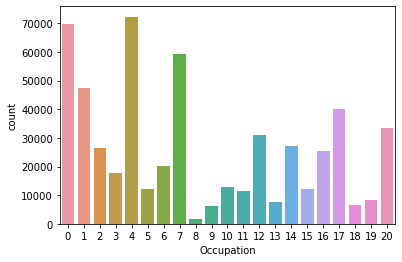

In [19]:
sns.countplot(x = 'Occupation',data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

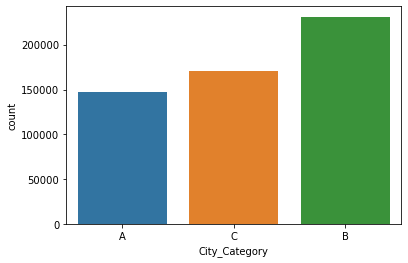

In [20]:
sns.countplot(x = 'City_Category',data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

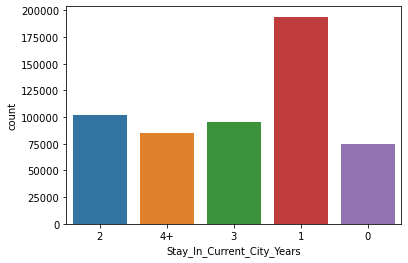

In [21]:
sns.countplot(x = 'Stay_In_Current_City_Years',data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

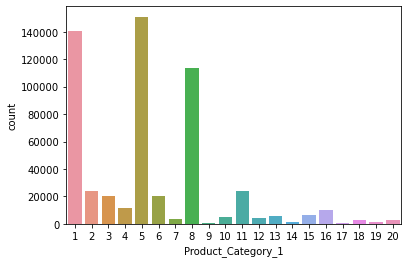

In [22]:
sns.countplot(x = 'Product_Category_1',data = df)

In [23]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

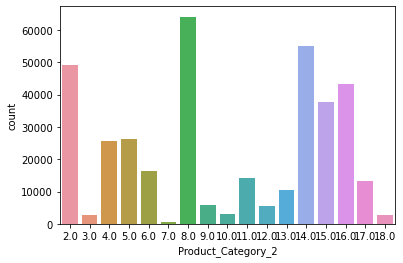

In [24]:
sns.countplot(x = 'Product_Category_2',data = df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

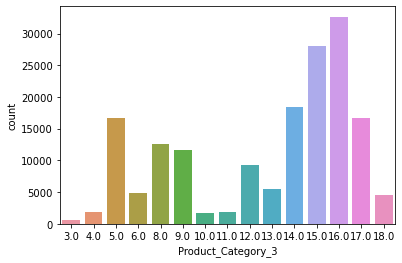

In [25]:
sns.countplot(x = 'Product_Category_3',data = df)

In [26]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
# imputing the values with a constant

df['Product_Category_2'].fillna(19, inplace=True)
df['Product_Category_3'].fillna(19, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping


{'F': 0, 'M': 1}

In [29]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df.Age = le1.fit_transform(df.Age)
le_name_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
le_name_mapping1

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

In [31]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df.Stay_In_Current_City_Years = le1.fit_transform(df.Stay_In_Current_City_Years)
le_name_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
le_name_mapping1


{'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

In [32]:
dt = pd.get_dummies(df.City_Category)

In [33]:
df = pd.concat([df, dt], axis=1)

In [34]:
df.drop(columns=['City_Category'],axis = 1, inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  A                           550068 non-null  uint8  
 12  B                           550068 non-null  uint8  
 13  C             

In [36]:
df.drop(columns=['User_ID', 'Product_ID'],axis = 1, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int32  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   A                           550068 non-null  uint8  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(3), int64(4), uint8(3)
memory usage: 33.0 MB


In [38]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
A                             0
B                             0
C                             0
dtype: int64

In [39]:
y = df.Purchase
X = df.drop(columns= ['Purchase'],axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

#spliting data set into 80 and 20 percent.

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model_1_LinearRegression = LinearRegression()   
model_1_LinearRegression.fit(X_train, y_train)  

LinearRegression()

In [49]:
y_pred = model_1_LinearRegression.predict(X_test)

In [42]:
# LinearRegression accuracy
model_1_LinearRegression.score(X_test, y_test)

0.14497008058810779

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
model_2_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 0)
model_2_DecisionTreeRegressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [44]:
# DecisionTreeRegressor accuracy
model_2_DecisionTreeRegressor.score(X_test,y_test)

0.5673416953318338

### XGBoost

In [45]:
import xgboost as xg
model_3_XGBRegressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 25, seed = 10) 
model_3_XGBRegressor.fit(X_train,y_train)

[10:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=10, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=10, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
# XGBRegressor accuracy
model_3_XGBRegressor.score(X_test,y_test)

0.6638326837907499

### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [50]:
X, y = make_regression(n_features=4, n_informative=2, random_state=7, shuffle=False)

In [51]:
params = {'n_estimators': [500],
         'criterion': ['mse'],
         'max_features': ['sqrt', 'log2'],
         'warm_start':[True],
         'n_jobs':[-1]}

rfr1 = RandomForestRegressor()

In [52]:
from sklearn.model_selection import GridSearchCV
rfr1_model = GridSearchCV(rfr1, params, cv=3)
rfr1_model.fit(X_train, y_train)
best_rfr1_model = rfr1_model.best_estimator_
best_rfr1_model

RandomForestRegressor(max_features='sqrt', n_estimators=500, n_jobs=-1,
                      warm_start=True)

In [53]:
rfr1_model_pipeline = Pipeline(steps=[('rfr_model',RandomForestRegressor(criterion='mse', n_estimators=500, max_features='log2',
                                                                n_jobs=-1, warm_start=True))])
rfr1_model_pipeline.fit(X_train,y_train)
y_test_pre = rfr1_model_pipeline.predict(X_test)
print(rfr1_model_pipeline.score(X_test,y_test))

0.6381038302184262
